# Project: Predicting Healthcare Transportation Issues with Classification

**Objective:** Build a model to predict which medical insurance members will likely have transportation issues that inhibit their ability to access healthcare services.

**Tools Used:** Python, Pandas, scikit-learn, SMOTE, XG Boost, Matplotlib, Seaborn

**Skills Demonstrated:** Exploratory Data Analysis, Data Preprocessing, Model Building, Model Validation, Data Visualization

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

## A. Exploratory Data Analysis

In [2]:
# Load the dataset containing Humana data.
df = pd.read_csv('member_data.csv', na_values=['NA'], sep=',', low_memory=False)

In [3]:
# Display shape of DataFrame.
df.shape

(69572, 826)

In [4]:
# Display summary statistics for DataFrame.
df.describe(include='all')

,person_id_syn,transportation_issues,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,dcsi_score,fci_score,hcc_weighted_sum,betos_d1c_pmpm_ct,betos_d1d_pmpm_ct,betos_m1b_pmpm_ct,betos_m2c_pmpm_ct,betos_m5b_pmpm_ct,betos_m5c_pmpm_ct,betos_m5d_pmpm_ct,betos_o1a_pmpm_ct,betos_o1b_pmpm_ct,betos_o1e_pmpm_ct,betos_o1g_pmpm_ct,betos_t1a_pmpm_ct,betos_t1b_pmpm_ct,betos_t1e_pmpm_ct,betos_t1h_pmpm_ct,betos_t2a_pmpm_ct,betos_y2_pmpm_ct,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,ccsp_020_ind,ccsp_021_ind,ccsp_034_ind,ccsp_060_ind,ccsp_062_ind,ccsp_080_ind,ccsp_107_ind,ccsp_120_ind,ccsp_125_ind,ccsp_130_ind,ccsp_163_ind,ccsp_169_ind,ccsp_204_ind,ccsp_205_ind,ccsp_212_ind,ccsp_220_ind,ccsp_228_ind,ccsp_236_ind,ccsp_239_ind,ccsp_242_ind,cms_disabled_ind,cms_dual_eligible_ind,cms_hospice_ind,cms_low_income_ind,cms_ma_risk_score_nbr,cms_partd_ra_factor_amt,cms_ra_factor_type_cd,cms_risk_adj_payment_rate_a_amt,cms_risk_adj_payment_rate_b_amt,cms_risk_adjustment_factor_a_amt,cms_rx_risk_score_nbr,cms_tot_ma_payment_amt,cms_tot_partd_payment_amt,cmsd2_can_unc_neo/plycyth/myelo_ind,cmsd2_eye_blindness_ind,cmsd2_gus_m_genital_ind,cmsd2_men_mad_ind,cmsd2_men_men_substance_ind,cmsd2_mus_polyarthropath_ind,cmsd2_mus_spondylopath_ind,cmsd2_skn_radiation_ind,cmsd2_sns_general_ind,cons_cmys,cons_hcaccprf_h,cons_hcaccprf_p,cons_hhcomp,cons_homstat,cons_n2029_y,cons_n2mob,cons_n2pbl,cons_n2pmv,cons_n65p_y,cons_online_buyer,cons_ret_y,cons_retail_buyer,cons_veteran_y,credit_bal_1stmtg_30to59dpd,credit_bal_1stmtg_60to89dpd,credit_bal_1stmtg_collections,credit_bal_1stmtg_severederog,credit_bal_1stmtgcredit_60dpd,credit_bal_agency1stmorg_collectio,credit_bal_agencyfirstmtg_60dpd,credit_bal_agencyfirstmtg_new,credit_bal_autobank,credit_bal_autobank_new,credit_bal_autofinance,credit_bal_autofinance_new,credit_bal_bankcard_severederog,credit_bal_consumerfinance,credit_bal_consumerfinance_new,credit_bal_heloc_60dpd,credit_bal_heloc_severederog,credit_bal_mtg_90to119dpd,credit_bal_mtg_bankruptcy,credit_bal_mtg_severederog,credit_bal_mtgcredit_new,credit_bal_nonagn1stmorg_30to59dpd,credit_bal_nonagn1stmorg_60to89dpd,credit_bal_nonagn1stmorg_90to119dp,credit_bal_nonagn1stmorg_bankruptc,credit_bal_nonagn1stmorg_collectio,credit_bal_nonagnfirstmtg_60dpd,credit_bal_nonmtgcredit_60dpd,credit_bal_studentloan_60dpd,credit_bal_totalallcredit_60dpd,credit_bal_totalallcredit_60to89dpd,credit_bal_totalallcredit_90to119dpd,credit_bal_totalallcredit_new,credit_hh_1stmtg_severederog,credit_hh_1stmtgcredit,credit_hh_1stmtgcredit_new,credit_hh_agencyfirstmtg,credit_hh_agencyfirstmtg_new,credit_hh_autobank,credit_hh_autobank_new,credit_hh_autofinance,credit_hh_autofinance_new,credit_hh_bankcard_severederog,credit_hh_bankcardcredit_60dpd,credit_hh_consumerfinance,credit_hh_consumerfinance_new,credit_hh_mtg_severederog,credit_hh_mtgcredit_new,credit_hh_nonagnfirstmtg,credit_hh_nonmtgcredit_60dpd,credit_hh_studentloan,credit_hh_studentloan_60dpd,credit_hh_totalallcredit_bankruptcy,credit_hh_totalallcredit_collections,credit_hh_totalallcredit_severederog,credit_highcrd_consumerfinance_new,credit_minmob_1stmtgcredit,credit_minmob_agencyfirstmtg,credit_minmob_mtgcredit,credit_minmob_nonagn,credit_num_1stmtg_30to59dpd,credit_num_1stmtg_60to89dpd,credit_num_1stmtg_bankruptcy,credit_num_1stmtg_collections,credit_num_1stmtg_severederog,credit_num_1stmtgcredit,credit_num_1stmtgcredit_new,credit_num_agency1stmorg_collectio,credit_num_agencyfirstmtg,credit_num_agencyfirstmtg_60dpd,credit_num_agencyfirstmtg_new,credit_num_autobank,credit_num_autobank_new,credit_num_autofinance,credit_num_autofinance_new,credit_num_bankcard_severederog,credit_num_consumerfinance,credit_num_consumerfinance_new,credit_num_heloc_60dpd,credit_num_heloc_severederog,credit_num_mtg_60to89dpd,credit_num_mtg_90to119dpd,credit_num_mtg_collections,credit_num_mtg_severederog,credit_num_mtgcredit_new,credit_num_nonagn1stm

In [5]:
# Display first 5 records in DataFrame.
df.head()

,person_id_syn,transportation_issues,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,dcsi_score,fci_score,hcc_weighted_sum,betos_d1c_pmpm_ct,betos_d1d_pmpm_ct,betos_m1b_pmpm_ct,betos_m2c_pmpm_ct,betos_m5b_pmpm_ct,betos_m5c_pmpm_ct,betos_m5d_pmpm_ct,betos_o1a_pmpm_ct,betos_o1b_pmpm_ct,betos_o1e_pmpm_ct,betos_o1g_pmpm_ct,betos_t1a_pmpm_ct,betos_t1b_pmpm_ct,betos_t1e_pmpm_ct,betos_t1h_pmpm_ct,betos_t2a_pmpm_ct,betos_y2_pmpm_ct,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,ccsp_020_ind,ccsp_021_ind,ccsp_034_ind,ccsp_060_ind,ccsp_062_ind,ccsp_080_ind,ccsp_107_ind,ccsp_120_ind,ccsp_125_ind,ccsp_130_ind,ccsp_163_ind,ccsp_169_ind,ccsp_204_ind,ccsp_205_ind,ccsp_212_ind,ccsp_220_ind,ccsp_228_ind,ccsp_236_ind,ccsp_239_ind,ccsp_242_ind,cms_disabled_ind,cms_dual_eligible_ind,cms_hospice_ind,cms_low_income_ind,cms_ma_risk_score_nbr,cms_partd_ra_factor_amt,cms_ra_factor_type_cd,cms_risk_adj_payment_rate_a_amt,cms_risk_adj_payment_rate_b_amt,cms_risk_adjustment_factor_a_amt,cms_rx_risk_score_nbr,cms_tot_ma_payment_amt,cms_tot_partd_payment_amt,cmsd2_can_unc_neo/plycyth/myelo_ind,cmsd2_eye_blindness_ind,cmsd2_gus_m_genital_ind,cmsd2_men_mad_ind,cmsd2_men_men_substance_ind,cmsd2_mus_polyarthropath_ind,cmsd2_mus_spondylopath_ind,cmsd2_skn_radiation_ind,cmsd2_sns_general_ind,cons_cmys,cons_hcaccprf_h,cons_hcaccprf_p,cons_hhcomp,cons_homstat,cons_n2029_y,cons_n2mob,cons_n2pbl,cons_n2pmv,cons_n65p_y,cons_online_buyer,cons_ret_y,cons_retail_buyer,cons_veteran_y,credit_bal_1stmtg_30to59dpd,credit_bal_1stmtg_60to89dpd,credit_bal_1stmtg_collections,credit_bal_1stmtg_severederog,credit_bal_1stmtgcredit_60dpd,credit_bal_agency1stmorg_collectio,credit_bal_agencyfirstmtg_60dpd,credit_bal_agencyfirstmtg_new,credit_bal_autobank,credit_bal_autobank_new,credit_bal_autofinance,credit_bal_autofinance_new,credit_bal_bankcard_severederog,credit_bal_consumerfinance,credit_bal_consumerfinance_new,credit_bal_heloc_60dpd,credit_bal_heloc_severederog,credit_bal_mtg_90to119dpd,credit_bal_mtg_bankruptcy,credit_bal_mtg_severederog,credit_bal_mtgcredit_new,credit_bal_nonagn1stmorg_30to59dpd,credit_bal_nonagn1stmorg_60to89dpd,credit_bal_nonagn1stmorg_90to119dp,credit_bal_nonagn1stmorg_bankruptc,credit_bal_nonagn1stmorg_collectio,credit_bal_nonagnfirstmtg_60dpd,credit_bal_nonmtgcredit_60dpd,credit_bal_studentloan_60dpd,credit_bal_totalallcredit_60dpd,credit_bal_totalallcredit_60to89dpd,credit_bal_totalallcredit_90to119dpd,credit_bal_totalallcredit_new,credit_hh_1stmtg_severederog,credit_hh_1stmtgcredit,credit_hh_1stmtgcredit_new,credit_hh_agencyfirstmtg,credit_hh_agencyfirstmtg_new,credit_hh_autobank,credit_hh_autobank_new,credit_hh_autofinance,credit_hh_autofinance_new,credit_hh_bankcard_severederog,credit_hh_bankcardcredit_60dpd,credit_hh_consumerfinance,credit_hh_consumerfinance_new,credit_hh_mtg_severederog,credit_hh_mtgcredit_new,credit_hh_nonagnfirstmtg,credit_hh_nonmtgcredit_60dpd,credit_hh_studentloan,credit_hh_studentloan_60dpd,credit_hh_totalallcredit_bankruptcy,credit_hh_totalallcredit_collections,credit_hh_totalallcredit_severederog,credit_highcrd_consumerfinance_new,credit_minmob_1stmtgcredit,credit_minmob_agencyfirstmtg,credit_minmob_mtgcredit,credit_minmob_nonagn,credit_num_1stmtg_30to59dpd,credit_num_1stmtg_60to89dpd,credit_num_1stmtg_bankruptcy,credit_num_1stmtg_collections,credit_num_1stmtg_severederog,credit_num_1stmtgcredit,credit_num_1stmtgcredit_new,credit_num_agency1stmorg_collectio,credit_num_agencyfirstmtg,credit_num_agencyfirstmtg_60dpd,credit_num_agencyfirstmtg_new,credit_num_autobank,credit_num_autobank_new,credit_num_autofinance,credit_num_autofinance_new,credit_num_bankcard_severederog,credit_num_consumerfinance,credit_num_consumerfinance_new,credit_num_heloc_60dpd,credit_num_heloc_severederog,credit_num_mtg_60to89dpd,credit_num_mtg_90to119dpd,credit_num_mtg_collections,credit_num_mtg_severederog,credit_num_mtgcredit_new,credit_num_nonagn1stm

In [6]:
# List column names.
df.columns

Index(['person_id_syn', 'transportation_issues', 'src_platform_cd', 'sex_cd',
       'est_age', 'smoker_current_ind', 'smoker_former_ind', 'lang_spoken_cd',
       'mabh_seg', 'cci_score',
       ...
       'submcc_rar_scl_ind', 'rx_gpi2_74_ind', 'rx_gpi2_89_ind',
       'rx_gpi2_96_ind', 'submcc_rsk_obe_ind', 'rx_gpi2_22_ind',
       'submcc_rsk_synx_ind', 'submcc_rsk_coag_ind', 'submcc_rsk_othr_ind',
       'submcc_rsk_chol_ind'],
      dtype='object', length=826)

In [7]:
# Identify columns containing null values.
df.columns[df.isnull().any()]

Index(['cms_ma_risk_score_nbr', 'cms_partd_ra_factor_amt',
       'cms_ra_factor_type_cd', 'cms_risk_adj_payment_rate_a_amt',
       'cms_risk_adj_payment_rate_b_amt', 'cms_risk_adjustment_factor_a_amt',
       'cms_rx_risk_score_nbr', 'cms_tot_ma_payment_amt',
       'cms_tot_partd_payment_amt', 'cons_cmys',
       ...
       'credit_prcnt_nonagnfirstmtg', 'hedis_ami', 'hedis_cmc_ldc_c_control',
       'hedis_cmc_ldc_c_screen', 'hedis_dia_eye', 'hedis_dia_hba1c_ge9',
       'hedis_dia_hba1c_test', 'hedis_dia_ldc_c_control',
       'hedis_dia_ldc_c_screen', 'hedis_dia_ma_nephr'],
      dtype='object', length=131)

In [8]:
# Display number of null values in DataFrame.
df.isnull().sum().sum()

512802

In [9]:
# Check DataFrame for duplicate rows.
df[df.duplicated()]

,person_id_syn,transportation_issues,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,dcsi_score,fci_score,hcc_weighted_sum,betos_d1c_pmpm_ct,betos_d1d_pmpm_ct,betos_m1b_pmpm_ct,betos_m2c_pmpm_ct,betos_m5b_pmpm_ct,betos_m5c_pmpm_ct,betos_m5d_pmpm_ct,betos_o1a_pmpm_ct,betos_o1b_pmpm_ct,betos_o1e_pmpm_ct,betos_o1g_pmpm_ct,betos_t1a_pmpm_ct,betos_t1b_pmpm_ct,betos_t1e_pmpm_ct,betos_t1h_pmpm_ct,betos_t2a_pmpm_ct,betos_y2_pmpm_ct,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,ccsp_020_ind,ccsp_021_ind,ccsp_034_ind,ccsp_060_ind,ccsp_062_ind,ccsp_080_ind,ccsp_107_ind,ccsp_120_ind,ccsp_125_ind,ccsp_130_ind,ccsp_163_ind,ccsp_169_ind,ccsp_204_ind,ccsp_205_ind,ccsp_212_ind,ccsp_220_ind,ccsp_228_ind,ccsp_236_ind,ccsp_239_ind,ccsp_242_ind,cms_disabled_ind,cms_dual_eligible_ind,cms_hospice_ind,cms_low_income_ind,cms_ma_risk_score_nbr,cms_partd_ra_factor_amt,cms_ra_factor_type_cd,cms_risk_adj_payment_rate_a_amt,cms_risk_adj_payment_rate_b_amt,cms_risk_adjustment_factor_a_amt,cms_rx_risk_score_nbr,cms_tot_ma_payment_amt,cms_tot_partd_payment_amt,cmsd2_can_unc_neo/plycyth/myelo_ind,cmsd2_eye_blindness_ind,cmsd2_gus_m_genital_ind,cmsd2_men_mad_ind,cmsd2_men_men_substance_ind,cmsd2_mus_polyarthropath_ind,cmsd2_mus_spondylopath_ind,cmsd2_skn_radiation_ind,cmsd2_sns_general_ind,cons_cmys,cons_hcaccprf_h,cons_hcaccprf_p,cons_hhcomp,cons_homstat,cons_n2029_y,cons_n2mob,cons_n2pbl,cons_n2pmv,cons_n65p_y,cons_online_buyer,cons_ret_y,cons_retail_buyer,cons_veteran_y,credit_bal_1stmtg_30to59dpd,credit_bal_1stmtg_60to89dpd,credit_bal_1stmtg_collections,credit_bal_1stmtg_severederog,credit_bal_1stmtgcredit_60dpd,credit_bal_agency1stmorg_collectio,credit_bal_agencyfirstmtg_60dpd,credit_bal_agencyfirstmtg_new,credit_bal_autobank,credit_bal_autobank_new,credit_bal_autofinance,credit_bal_autofinance_new,credit_bal_bankcard_severederog,credit_bal_consumerfinance,credit_bal_consumerfinance_new,credit_bal_heloc_60dpd,credit_bal_heloc_severederog,credit_bal_mtg_90to119dpd,credit_bal_mtg_bankruptcy,credit_bal_mtg_severederog,credit_bal_mtgcredit_new,credit_bal_nonagn1stmorg_30to59dpd,credit_bal_nonagn1stmorg_60to89dpd,credit_bal_nonagn1stmorg_90to119dp,credit_bal_nonagn1stmorg_bankruptc,credit_bal_nonagn1stmorg_collectio,credit_bal_nonagnfirstmtg_60dpd,credit_bal_nonmtgcredit_60dpd,credit_bal_studentloan_60dpd,credit_bal_totalallcredit_60dpd,credit_bal_totalallcredit_60to89dpd,credit_bal_totalallcredit_90to119dpd,credit_bal_totalallcredit_new,credit_hh_1stmtg_severederog,credit_hh_1stmtgcredit,credit_hh_1stmtgcredit_new,credit_hh_agencyfirstmtg,credit_hh_agencyfirstmtg_new,credit_hh_autobank,credit_hh_autobank_new,credit_hh_autofinance,credit_hh_autofinance_new,credit_hh_bankcard_severederog,credit_hh_bankcardcredit_60dpd,credit_hh_consumerfinance,credit_hh_consumerfinance_new,credit_hh_mtg_severederog,credit_hh_mtgcredit_new,credit_hh_nonagnfirstmtg,credit_hh_nonmtgcredit_60dpd,credit_hh_studentloan,credit_hh_studentloan_60dpd,credit_hh_totalallcredit_bankruptcy,credit_hh_totalallcredit_collections,credit_hh_totalallcredit_severederog,credit_highcrd_consumerfinance_new,credit_minmob_1stmtgcredit,credit_minmob_agencyfirstmtg,credit_minmob_mtgcredit,credit_minmob_nonagn,credit_num_1stmtg_30to59dpd,credit_num_1stmtg_60to89dpd,credit_num_1stmtg_bankruptcy,credit_num_1stmtg_collections,credit_num_1stmtg_severederog,credit_num_1stmtgcredit,credit_num_1stmtgcredit_new,credit_num_agency1stmorg_collectio,credit_num_agencyfirstmtg,credit_num_agencyfirstmtg_60dpd,credit_num_agencyfirstmtg_new,credit_num_autobank,credit_num_autobank_new,credit_num_autofinance,credit_num_autofinance_new,credit_num_bankcard_severederog,credit_num_consumerfinance,credit_num_consumerfinance_new,credit_num_heloc_60dpd,credit_num_heloc_severederog,credit_num_mtg_60to89dpd,credit_num_mtg_90to119dpd,credit_num_mtg_collections,credit_num_mtg_severederog,credit_num_mtgcredit_new,credit_num_nonagn1stm

### 1. Explore Transportation Issues

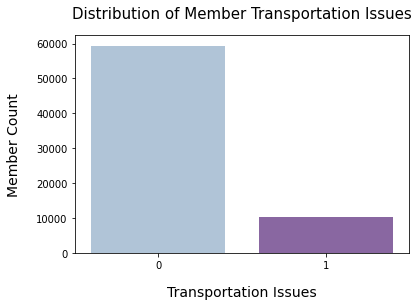

In [10]:
# Display plot of distribution of gender for members with transportation issues.
s = sns.countplot(x='transportation_issues', palette='BuPu', data=df)
plt.xlabel('Transportation Issues', fontsize=14, labelpad=15)
plt.ylabel('Member Count', fontsize=14, labelpad=15)
plt.title('Distribution of Member Transportation Issues', y=1.05, fontsize=15)
plt.show()

In [11]:
df['transportation_issues'].value_counts()

0    59375
1    10197
Name: transportation_issues, dtype: int64

### 2. Explore Gender Feature

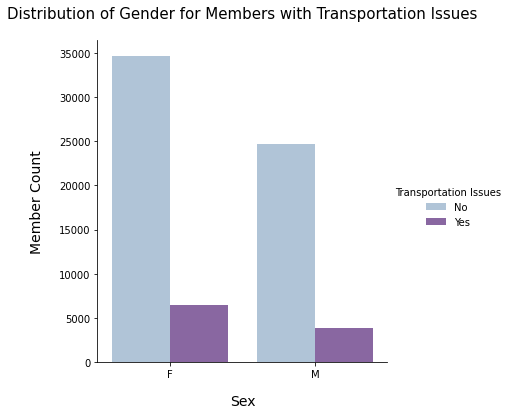

In [12]:
# Display plot of distribution of gender for members with transportation issues.
s = sns.catplot(x="sex_cd", hue="transportation_issues", kind="count", palette='BuPu', data=df)
plt.xlabel('Sex', fontsize=14, labelpad=15)
plt.ylabel('Member Count', fontsize=14, labelpad=15)
plt.title('Distribution of Gender for Members with Transportation Issues', y=1.05, fontsize=15)

s._legend.set_title('Transportation Issues')
for t, l in zip(s._legend.texts, ['No', 'Yes']): t.set_text(l)

### 3. Explore Zip Code Feature

In [13]:
df.groupby('zip_cd')['person_id_syn'].count().sort_values(ascending=False)

zip_cd
other    46773
33027      117
33411      105
34667       90
33024       90
         ...  
86403        9
75605        9
33405        9
40219        6
32405        5
Name: person_id_syn, Length: 840, dtype: int64

In [14]:
# Display summary of members with transportation issues by zip code.
df_zip = pd.crosstab(df.zip_cd,df.transportation_issues).reset_index()
df_zip['proportion'] = df_zip[1] / (df_zip[0] + df_zip[1]) * 100
df_zip.sort_values(by=['proportion'], ascending=False)

transportation_issues,zip_cd,0,1,proportion
192,32566,10,18,64.285714
191,32548,6,8,57.142857
112,30083,8,9,52.941176
178,32501,10,10,50.000000
237,33010,6,6,50.000000
...,...,...,...,...
17,23464,50,0,0.000000
63,28054,9,0,0.000000
394,33755,9,0,0.000000
48,27292,11,0,0.000000


### 4. Explore Disability Feature

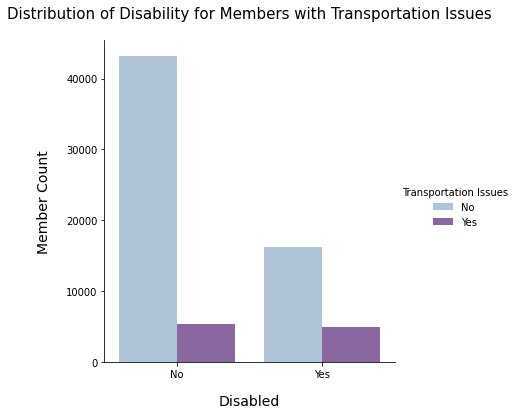

In [15]:
# Display plot of distribution of disability for members with transportation issues.
s = sns.catplot(x="cms_disabled_ind", hue="transportation_issues", kind="count", palette='BuPu', data=df)
plt.xlabel('Disabled', fontsize=14, labelpad=15)
plt.ylabel('Member Count', fontsize=14, labelpad=15)
plt.title('Distribution of Disability for Members with Transportation Issues', y=1.05, fontsize=15)

s._legend.set_title('Transportation Issues')
for t, l in zip(s._legend.texts, ['No', 'Yes']): t.set_text(l)
s.set_xticklabels( ('No', 'Yes') )
plt.show()

## B. Data Preprocessing

### 1. Preprocess Categorical Columns

In [16]:
# Review categorical features.
c_cols = df.select_dtypes(include='object')
c_cols.nunique().sort_values(ascending=False).reset_index()

,index,0
0,person_id_syn,69572
1,zip_cd,840
2,cnty_cd,109
3,state_cd,31
4,mabh_seg,16
...,...,...
17,hedis_dia_eye,2
18,hedis_dia_hba1c_ge9,2
19,hedis_dia_hba1c_test,2
20,hedis_dia_ldc_c_control,2


In [17]:
c_cols['zip_cd'].value_counts().reset_index()

,index,zip_cd
0,other,46773
1,33027,117
2,33411,105
3,33024,90
4,34667,90
...,...,...
835,33405,9
836,28054,9
837,86403,9
838,40219,6


In [18]:
c_cols['cnty_cd'].value_counts().reset_index()

,index,cnty_cd
0,other,46773
1,011,1868
2,099,1373
3,086,1128
4,003,984
...,...,...
104,441,16
105,065,16
106,131,15
107,439,14


In [19]:
c_cols['state_cd'].value_counts().reset_index()

,index,state_cd
0,other,46773
1,FL,10503
2,LA,1816
3,TN,1583
4,NV,951
...,...,...
26,NM,36
27,WI,21
28,WV,19
29,SD,18


In [20]:
c_cols['cons_homstat'].value_counts().reset_index()

,index,cons_homstat
0,Y,34814
1,U,5658
2,P,5069
3,R,4176
4,T,575


In [21]:
# Y represents home ownership and P represents probable home ownership.  All others represent are non-ownership.
c_cols['cons_homstat'] = c_cols['cons_homstat'].replace(['P'], 'Y')
c_cols['cons_homstat'] = c_cols['cons_homstat'].replace(['U','R','T'],'Other')
c_cols['cons_homstat'].value_counts().reset_index()

,index,cons_homstat
0,Y,39883
1,Other,10409


In [22]:
c_cols['cons_cmys'].value_counts().reset_index()

,index,cons_cmys
0,4,23539
1,3,19253
2,6,3913
3,5,3404
4,2,139
5,0,42
6,*,15


In [23]:
# *, 0, 2 and 3 all represent high school diploma or lower.
c_cols['cons_cmys'] = c_cols['cons_cmys'].replace(['0', '*', '2'],'3')
c_cols['cons_cmys'].value_counts().reset_index()

,index,cons_cmys
0,4,23539
1,3,19449
2,6,3913
3,5,3404


In [24]:
c_cols['cons_hhcomp'].value_counts().reset_index()

,index,cons_hhcomp
0,B,12957
1,L,10585
2,A,7032
3,U,5793
4,J,5783
5,D,1571
6,K,1480
7,G,1192
8,F,997
9,H,982


In [25]:
# Classify smaller clusters as other.
c_cols['cons_hhcomp'] = c_cols['cons_hhcomp'].replace(['E', 'I', 'C', 'H', 'F', 'G', 'K', 'D'], 'Other')
c_cols['cons_hhcomp'].value_counts().reset_index()

,index,cons_hhcomp
0,B,12957
1,L,10585
2,Other,8145
3,A,7032
4,U,5793
5,J,5783


In [26]:
c_cols['rucc_category'].value_counts().reset_index()

,index,rucc_category
0,1-Metro,37390
1,2-Metro,16889
2,3-Metro,5075
3,6-Nonmetro,4985
4,4-Nonmetro,2338
5,7-Nonmetro,1338
6,8-Nonmetro,563
7,5-Nonmetro,542
8,9-Nonmetro,452


In [27]:
# Simplify to metro and nonmetro.
c_cols['rucc_category'] = c_cols['rucc_category'].replace(['1-Metro', '2-Metro', '3-Metro'], 'Metro')
c_cols['rucc_category'] = c_cols['rucc_category'].replace(['6-Nonmetro', '4-Nonmetro', '7-Nonmetro', '8-Nonmetro',
                                                       '5-Nonmetro', '9-Nonmetro'], 'Nonmetro')
c_cols['rucc_category'].value_counts().reset_index()

,index,rucc_category
0,Metro,59354
1,Nonmetro,10218


In [28]:
c_cols['lang_spoken_cd'].value_counts().reset_index()

,index,lang_spoken_cd
0,ENG,63905
1,SPA,3683
2,E,1984


In [29]:
# Combine ENG and E.
c_cols['lang_spoken_cd'] = c_cols['lang_spoken_cd'].replace(['E','ENG'],'ENG')
c_cols['lang_spoken_cd'].value_counts().reset_index()

,index,lang_spoken_cd
0,ENG,65889
1,SPA,3683


In [30]:
c_cols['mabh_seg'].value_counts().reset_index()

,index,mabh_seg
0,H2,16418
1,UNK,12742
2,H6,7415
3,H1,6715
4,C4,6462
5,C2,5898
6,H7,4148
7,C5,2898
8,H4,2203
9,C3,1285


In [31]:
# Simplify to healthy, chronic and unknown.
c_cols['mabh_seg'] = c_cols['mabh_seg'].replace(['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8'], 'Healthy')
c_cols['mabh_seg'] = c_cols['mabh_seg'].replace(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'], 'Chronic')
c_cols['mabh_seg'].value_counts().reset_index()

,index,mabh_seg
0,Healthy,39137
1,Chronic,17693
2,UNK,12742


In [32]:
c_cols['cms_ra_factor_type_cd'].value_counts().reset_index()

,index,cms_ra_factor_type_cd
0,CN,50817
1,CP,7023
2,E,3651
3,CF,3530
4,D,174
5,C2,67
6,I,43
7,SE,36
8,*,7


In [33]:
# Classify smaller clusters as other.
c_cols['cms_ra_factor_type_cd'] = c_cols['cms_ra_factor_type_cd'].replace(['I', '*', 'SE', 'C2', 'D', 'CP', 
                                                                           'CF', 'E'], 'Other')
c_cols['cms_ra_factor_type_cd'].value_counts().reset_index()

,index,cms_ra_factor_type_cd
0,CN,50817
1,Other,14531


In [34]:
c_cols['hedis_dia_eye'].value_counts().reset_index()

,index,hedis_dia_eye
0,Y,66616
1,N,1864


In [35]:
# Drop features that don't have significant value.
df_object = c_cols.drop(['person_id_syn', 'zip_cd', 'cnty_cd', 'state_cd',
                            'lang_spoken_cd', 'hedis_dia_eye'], axis=1)

### 2. Eliminate Nulls in DataFrame

In [36]:
# Display % of nulls per feature.
missing_values = df.isnull().sum() / len(df) * 100
missing_values[missing_values > 0].sort_values(ascending=False).reset_index()

,index,0
0,hedis_ami,99.665095
1,hedis_cmc_ldc_c_control,78.957052
2,hedis_cmc_ldc_c_screen,78.954177
3,cons_homstat,27.712298
4,cons_n2029_y,27.710861
...,...,...
126,credit_bal_1stmtg_30to59dpd,0.329155
127,credit_bal_1stmtg_60to89dpd,0.327718
128,credit_bal_1stmtg_collections,0.327718
129,credit_bal_1stmtgcredit_60dpd,0.327718


In [37]:
# Drop rows with majority null values - used threshold of 70%.
df.drop(['hedis_ami', 'hedis_cmc_ldc_c_control', 'hedis_cmc_ldc_c_screen'], axis=1, inplace=True)

In [38]:
# Isolate features of type float and fill null with mean.
df_float = df.select_dtypes(include=[np.float])
df_float = df_float.fillna(df_float.mean())

In [39]:
# Isolate features of type int and fill null with median.
df_int = df.select_dtypes(include=[np.int64])
df_int = df_int.fillna(df_float.median())

In [40]:
# Isolate features of type object, fill null with most common value and factorize.
df_object = df_object.fillna(df_float.mode())
df_object = df_object.apply(lambda x: pd.factorize(x)[0])

In [41]:
# Bring all of the features back into a single DataFrame.
df = pd.concat([df_float, df_int, df_object], axis=1)

### 3. Drop Features with Low Variance

In [42]:
# Drop features with low variance.
def variance_threshold_selector(df_v, threshold=0):
    selector = VarianceThreshold(threshold)
    selector.fit(df_v)
    return df_v[df_v.columns[selector.get_support(indices=True)]]

Y = df['transportation_issues']
X = variance_threshold_selector(df, 0.5)

## C. Build XGB Classifier

In [43]:
# Split into train and test data sets.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [44]:
# Use Synthetic Minority Oversampling Technique (SMOTE) to deal with imbalanced data.
balance = SMOTE()
X_train_bal, y_train_bal = balance.fit_resample(X_train, y_train)

X_test_bal, y_test_bal = balance.fit_resample(X_test, y_test)

In [45]:
# Instantiate XGB classifier.
model = XGBClassifier()

# Define evaluation procedure.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Evaluate the model.
scores = cross_val_score(model, X_train_bal, y_train_bal, scoring='roc_auc', cv=cv, n_jobs=-1)

# Fit the model. 
model.fit(X_train_bal, y_train_bal)

XGBClassifier()

## D. Evaluate XGB Classifier Results

In [46]:
# Validate the classifier using the test set.
y_pred = model.predict(X_test_bal)

# Display a confusion matrix to evaluate results.
print(confusion_matrix(y_test_bal, y_pred))

[[10787  1089]
 [ 1793 10083]]


In [47]:
# Display classification report. 
print(classification_report(y_test_bal, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     11876
           1       0.90      0.85      0.87     11876

    accuracy                           0.88     23752
   macro avg       0.88      0.88      0.88     23752
weighted avg       0.88      0.88      0.88     23752



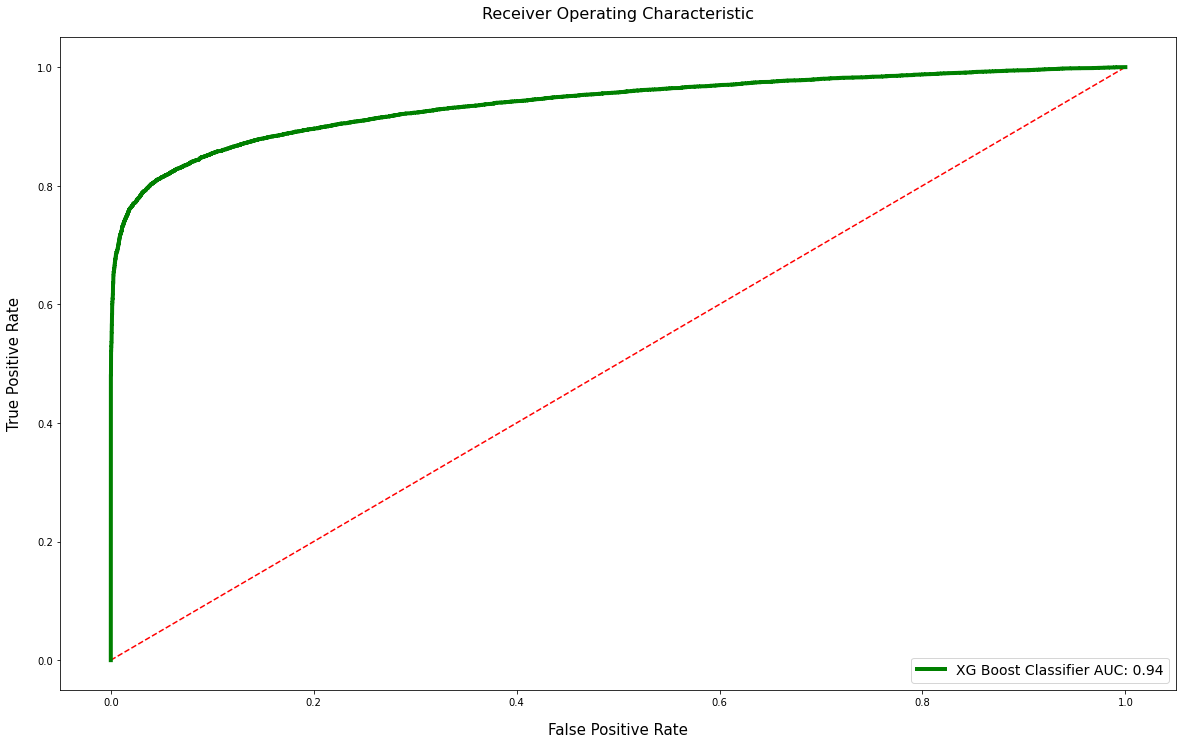

In [48]:
# Calculate metrics and plot ROC-AUC. 
probs = model.predict_proba(X_test_bal)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_bal, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(20, 12))
plt.plot([0,1], [0,1], 'r--')
label = 'XG Boost Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c='g', label=label, linewidth=4)
plt.xlabel('False Positive Rate', fontsize=15, labelpad=15)
plt.ylabel('True Positive Rate', fontsize=15, labelpad=15)
plt.title('Receiver Operating Characteristic', y=1.02, fontsize=16)
plt.legend(loc='lower right', fontsize=14)
plt.show()